# Covid data exploration



In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_classif
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.feature_selection import SelectKBest, chi2, f_regression
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

In [8]:
dataset = pd.read_csv('overdoses.csv', index_col=0)
dataset

,Cocaine (T40.5),Heroin (T40.1),Methadone (T40.3),Natural & semi-synthetic opioids (T40.2),"Natural & semi-synthetic opioids, incl. methadone (T40.2, T40.3)","Natural, semi-synthetic, & synthetic opioids, incl. methadone (T40.2-T40.4)",Number of Drug Overdose Deaths,"Opioids (T40.0-T40.4,T40.6)",Psychostimulants with abuse potential (T43.6),"Synthetic opioids, excl. methadone (T40.4)"
Date,,,,,,,,,,
2015-01-01,5496,10788,3413,12269,14944,19161,47523,28986,4402,5766
2015-02-01,5592,11002,3372,12237,14885,19358,47725,29269,4449,6079
2015-03-01,5729,11167,3387,12267,14929,19640,48198,29609,4586,6390
2015-04-01,5908,11471,3401,12356,15022,20124,48748,30240,4675,6868
2015-05-01,5987,11675,3421,12474,15133,20539,49293,30745,4785,7254
...,...,...,...,...,...,...,...,...,...,...
2020-04-01,17765,13977,2895,12272,14689,49966,76624,54879,18374,41932
2020-05-01,18476,14254,3053,12687,15227,53137,79974,57982,19243,45066
2020-06-01,18832,14241,3142,12767,15383,55169,82068,59935,19892,47199


In [9]:
dataset.shape

(68, 10)

In [10]:
dataset.head()

,Cocaine (T40.5),Heroin (T40.1),Methadone (T40.3),Natural & semi-synthetic opioids (T40.2),"Natural & semi-synthetic opioids, incl. methadone (T40.2, T40.3)","Natural, semi-synthetic, & synthetic opioids, incl. methadone (T40.2-T40.4)",Number of Drug Overdose Deaths,"Opioids (T40.0-T40.4,T40.6)",Psychostimulants with abuse potential (T43.6),"Synthetic opioids, excl. methadone (T40.4)"
Date,,,,,,,,,,
2015-01-01,5496,10788,3413,12269,14944,19161,47523,28986,4402,5766
2015-02-01,5592,11002,3372,12237,14885,19358,47725,29269,4449,6079
2015-03-01,5729,11167,3387,12267,14929,19640,48198,29609,4586,6390
2015-04-01,5908,11471,3401,12356,15022,20124,48748,30240,4675,6868
2015-05-01,5987,11675,3421,12474,15133,20539,49293,30745,4785,7254


## pearson correlation

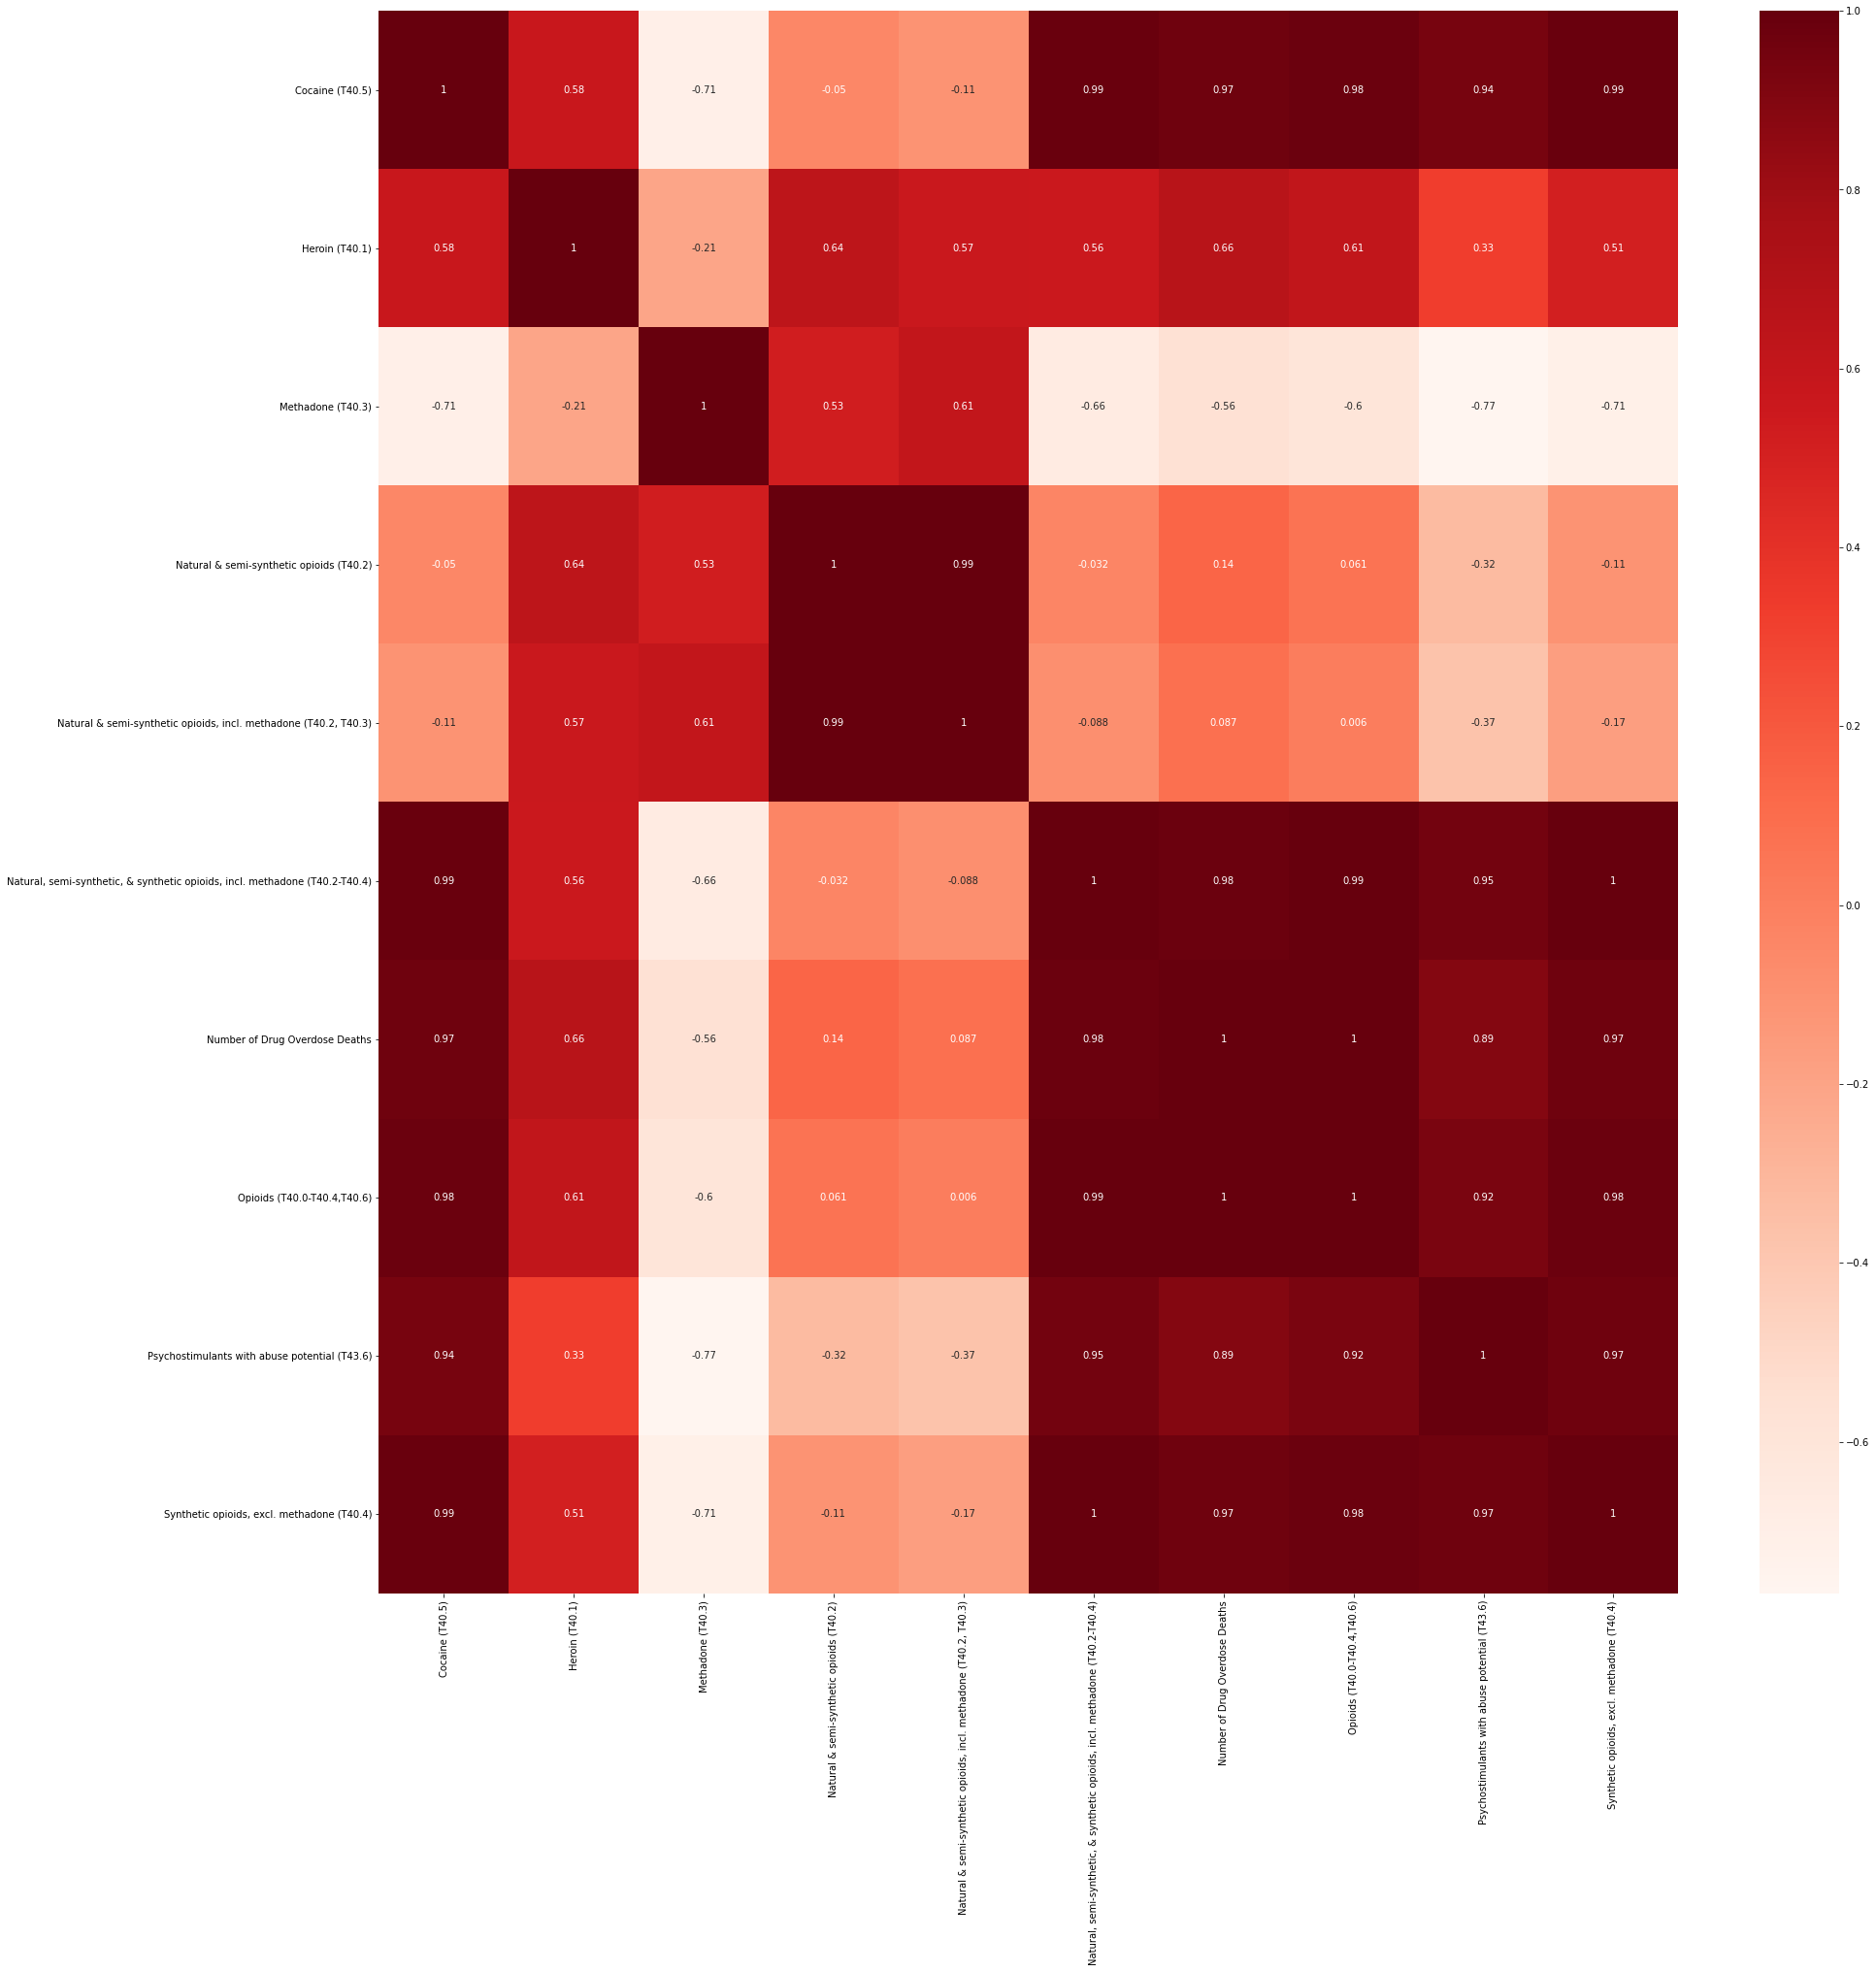

Date
2015-01-01    47523
2015-02-01    47725
2015-03-01    48198
2015-04-01    48748
2015-05-01    49293
              ...  
2020-04-01    76624
2020-05-01    79974
2020-06-01    82068
2020-07-01    83989
2020-08-01    85516
Name: Number of Drug Overdose Deaths, Length: 68, dtype: int64

In [12]:
#Using Pearson Correlation
plt.figure(figsize=(30,30))
cor = dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
#Correlation with output variable
cor_target = abs(dataset['Number of Drug Overdose Deaths'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Como entendemos que temos muitas features, após observar a matriz de correlações de pearson, fizemos um filtro preliminas de features, eliminando features cuja correlação fosse menor que +/-0.20.

In [33]:
dataset.columns

Index(['Cocaine (T40.5)', 'Heroin (T40.1)', 'Methadone (T40.3)',
       'Natural & semi-synthetic opioids (T40.2)',
       'Natural & semi-synthetic opioids, incl. methadone (T40.2, T40.3)',
       'Natural, semi-synthetic, & synthetic opioids, incl. methadone (T40.2-T40.4)',
       'Number of Drug Overdose Deaths', 'Opioids (T40.0-T40.4,T40.6)',
       'Psychostimulants with abuse potential (T43.6)',
       'Synthetic opioids, excl. methadone (T40.4)'],
      dtype='object')

In [34]:
dataset = dataset.drop(columns=['Natural & semi-synthetic opioids (T40.2)', 'Natural & semi-synthetic opioids, incl. methadone (T40.2, T40.3)'])

In [35]:
dataset.shape

(68, 8)

## Feature selection com SelectKBest

In [39]:
df_data = dataset.drop(columns='Number of Drug Overdose Deaths')
df_label = dataset['Number of Drug Overdose Deaths']

In [40]:
# Feature extraction
# test = SelectKBest(score_func=chi2)
# fit = test.fit_transform(df_data, df_label)
sel_f = SelectKBest(f_regression, k='all')
X_train_f = sel_f.fit_transform(df_data, df_label)
print(sel_f.get_support())


[ True  True  True  True  True  True  True]


Cocaine (T40.5) // Heroin (T40.1) // Methadone (T40.3) // Natural & semi-synthetic opioids (T40.2) // Natural & semi-synthetic opioids, incl. methadone (T40.2, T40.3) // Natural, semi-synthetic, & synthetic opioids, incl. methadone (T40.2-T40.4) // Opioids (T40.0-T40.4,T40.6) // Psychostimulants with abuse potential (T43.6) // Synthetic opioids, excl. methadone (T40.4)

In [41]:
df_data

,Cocaine (T40.5),Heroin (T40.1),Methadone (T40.3),"Natural, semi-synthetic, & synthetic opioids, incl. methadone (T40.2-T40.4)","Opioids (T40.0-T40.4,T40.6)",Psychostimulants with abuse potential (T43.6),"Synthetic opioids, excl. methadone (T40.4)"
Date,,,,,,,
2015-01-01,5496,10788,3413,19161,28986,4402,5766
2015-02-01,5592,11002,3372,19358,29269,4449,6079
2015-03-01,5729,11167,3387,19640,29609,4586,6390
2015-04-01,5908,11471,3401,20124,30240,4675,6868
2015-05-01,5987,11675,3421,20539,30745,4785,7254
...,...,...,...,...,...,...,...
2020-04-01,17765,13977,2895,49966,54879,18374,41932
2020-05-01,18476,14254,3053,53137,57982,19243,45066
2020-06-01,18832,14241,3142,55169,59935,19892,47199


## Feature selection of Lag Variables com Random Forest Regressor

We can also use feature selection to automatically identify and select those input features that are most predictive.

A popular method for feature selection is called Recursive Feature Selection (RFE).

RFE works by creating predictive models, weighting features, and pruning those with the smallest weights, then repeating the process until a desired number of features are left.

The code below uses RFE with a random forest predictive model and sets the desired number of input features to 10.

(A bar graph is also created showing the feature selection rank (smaller is better) for each input feature.)

Selected Features:
Cocaine (T40.5)
Heroin (T40.1)
Methadone (T40.3)
Natural, semi-synthetic, & synthetic opioids, incl. methadone (T40.2-T40.4)
Number of Drug Overdose Deaths
Opioids (T40.0-T40.4,T40.6)
Psychostimulants with abuse potential (T43.6)


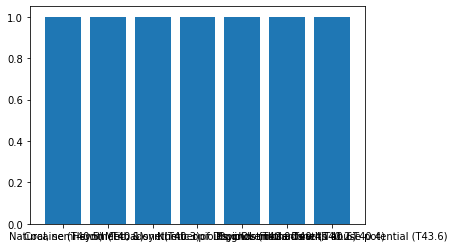

In [42]:
# separate into input and output variables
array = dataset.values
# perform feature selection
rfe = RFE(RandomForestRegressor(n_estimators=500, random_state=1), n_features_to_select=11)
fit = rfe.fit(df_data, df_label)
# report selected features
print('Selected Features:')
names = dataset.columns.values[0:-1]
for i in range(len(fit.support_)):
	if fit.support_[i]:
		print(names[i])
# plot feature rank
names = dataset.columns.values[0:-1]
ticks = [i for i in range(len(names))]
pyplot.bar(ticks, fit.ranking_,)
pyplot.xticks(ticks, names)
pyplot.show()

## Escolha final de features:
Após fazer estes dois métodos de selecção de features, e visto que o seus resultados são bastante parecidos, ficamos com as features seguintes. 

In [44]:
df_data.columns

Index(['Cocaine (T40.5)', 'Heroin (T40.1)', 'Methadone (T40.3)',
       'Natural, semi-synthetic, & synthetic opioids, incl. methadone (T40.2-T40.4)',
       'Opioids (T40.0-T40.4,T40.6)',
       'Psychostimulants with abuse potential (T43.6)',
       'Synthetic opioids, excl. methadone (T40.4)'],
      dtype='object')

In [45]:
df_data.shape

(68, 7)

In [46]:
df_data.columns

Index(['Cocaine (T40.5)', 'Heroin (T40.1)', 'Methadone (T40.3)',
       'Natural, semi-synthetic, & synthetic opioids, incl. methadone (T40.2-T40.4)',
       'Opioids (T40.0-T40.4,T40.6)',
       'Psychostimulants with abuse potential (T43.6)',
       'Synthetic opioids, excl. methadone (T40.4)'],
      dtype='object')